# Mintun1984 for Twilite and Image-Derived Input Functions

## Setup

In [1]:
import os
import sys
import numpy as np
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))


In [2]:
# system functions that are always useful to have
import time, sys, os
from pprint import pprint

from Mintun1984Context import Mintun1984Context
%matplotlib inline
# from matplotlib import pyplot as plt

In [3]:
# everything is decay corrected
kerndir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "kernels")
kern = os.path.join(kerndir, "kernel_hct=46.8.nii.gz")

oo1dir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "ses-20210421150523", "pet")
idif = os.path.join(oo1dir, "sub-108293_ses-20210421150523_trc-oo_proc-MipIdif_idif_dynesty-Boxcar-ideal.nii.gz")
twil = os.path.join(oo1dir, "sub-108293_ses-20210421150523_trc-oo_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc_dynesty-RadialArtery-ideal.nii.gz")
pet = os.path.join(oo1dir, "sub-108293_ses-20210421150523_trc-oo_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames_timeAppend-4-ParcSchaeffer-reshape-to-schaeffer-schaeffer.nii.gz")

hodir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "ses-20210421152358", "pet")
ks_idif = os.path.join(oo1dir, "sub-108293_ses-20210421152358_trc-ho_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-schaeffer-Raichle1983Boxcar-main7-rc1p85-vrc1-3000-qm.nii.gz")
ks_twil = os.path.join(oo1dir, "sub-108293_ses-20210421152358_trc-ho_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-schaeffer-Raichle1983Artery-main7-rc1p85-vrc1-3000-qm.nii.gz")

codir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "ses-20210421144815", "pet")
v1_idif = os.path.join(codir, "sub-108293_ses-20210421144815_trc-co_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-ParcSchaeffer-reshape-to-schaeffer-schaeffer-idif_martinv1.nii.gz")
v1_twil = os.path.join(codir, "sub-108293_ses-20210421144815_trc-co_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-ParcSchaeffer-reshape-to-schaeffer-schaeffer-twilite_martinv1.nii.gz")

data_dict_idif = {
    "input_func_fqfn": idif,
    "tissue_fqfn": pet,
    "v1_fqfn": v1_idif,
    "ks_fqfn": ks_idif,
    "nlive": 1000,
    "tag": "playground_mintun1984_idif"
}
data_dict_twil = {
    "kernel_fqfn": kern,
    "input_func_fqfn": twil,
    "tissue_fqfn": pet,
    "v1_fqfn": v1_twil,
    "ks_fqfn": ks_twil,
    "nlive": 1000,
    "tag": "playground_mintun1984_twil"
}

truth_idif = [2.02266859e-01, 1.30503331e+00, 7.19494722e-01, 1.00390665e+01, 9.82339382e+00, 1.74320833e+01, 1.72211248e-02]
truth_twil = [0.51932539, 0.68335921, 0.70828213, 4.55715122, 3.82516299, 6.14729027, 0.03415969]
mm_idif = Mintun1984Context(data_dict_idif)
mm_twil = Mintun1984Context(data_dict_twil)

parc_index = 25

## Inspect Mintun1984Context twil

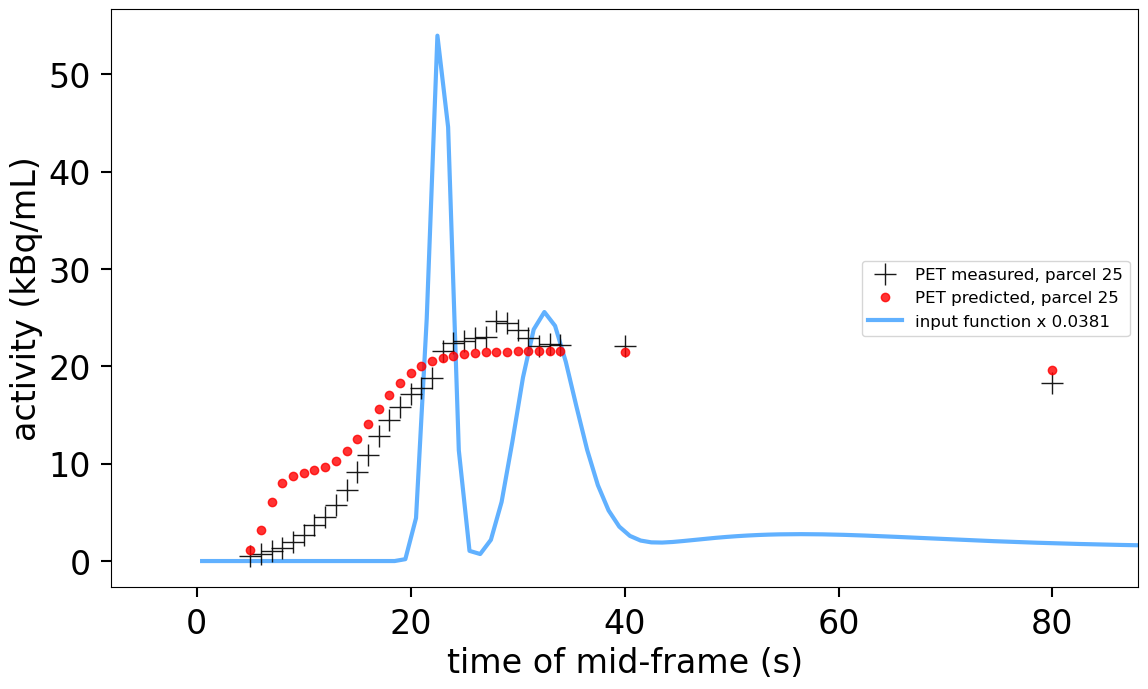

In [4]:
mm_twil.plotting.truths_plot(truths=truth_twil, parc_index=parc_index)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [5]:
# de novo, thalamus ~ 6, 25
res_twil = mm_twil.solver.run_nested(print_progress=True, parc_index=range(10))

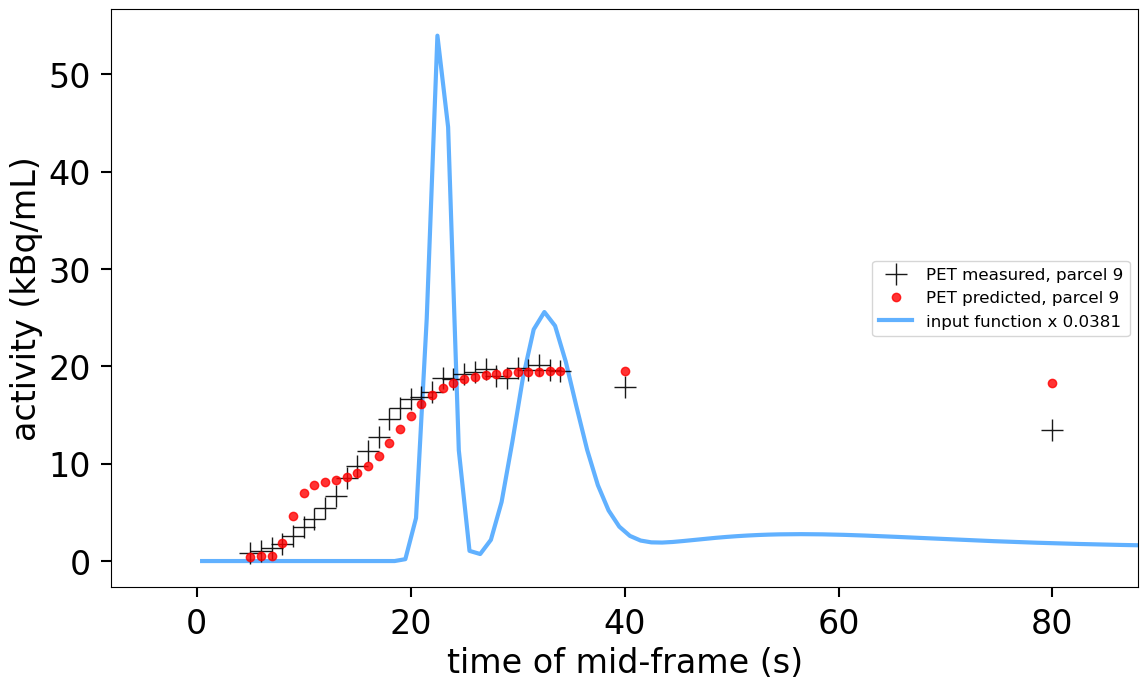

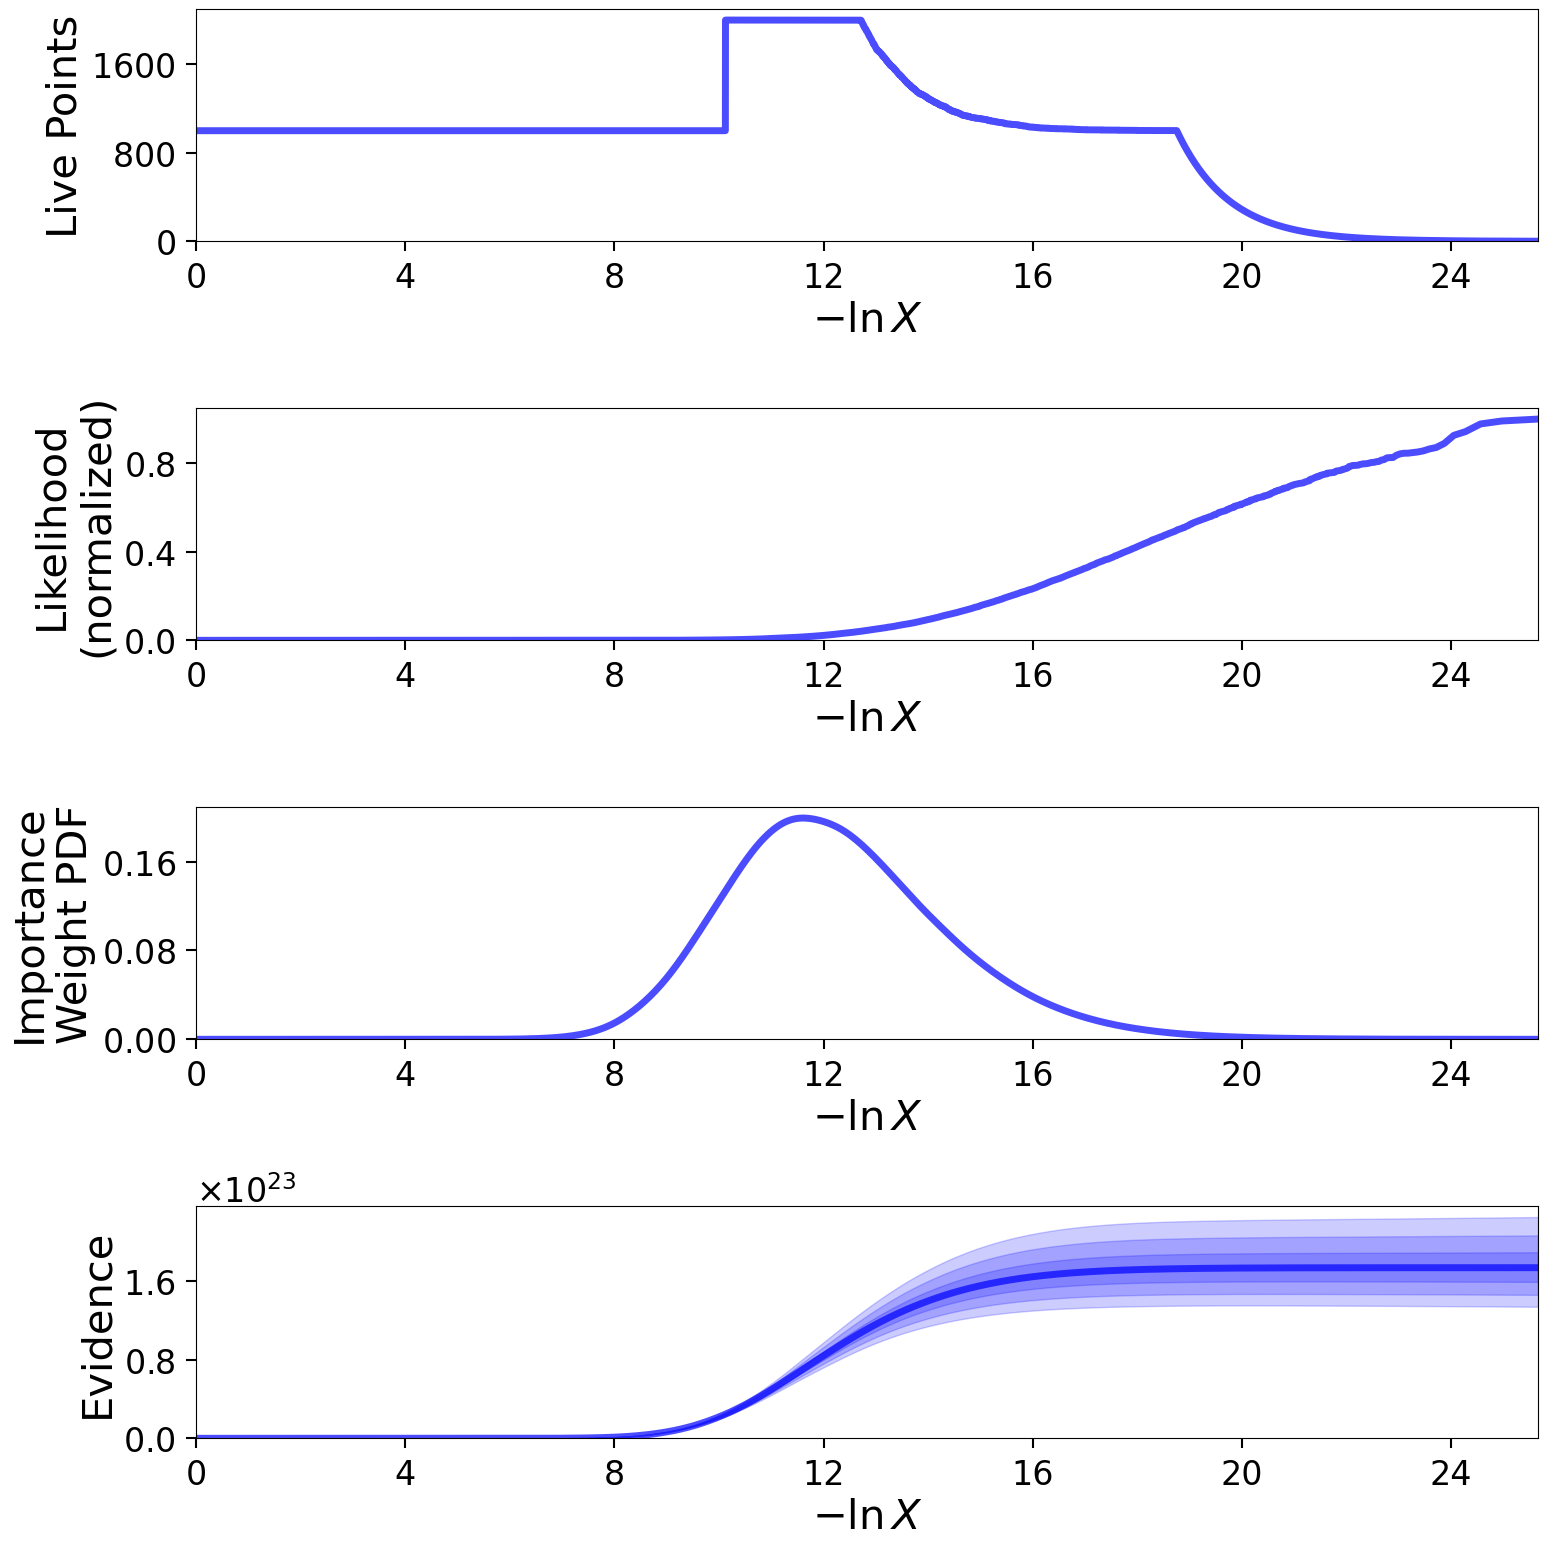

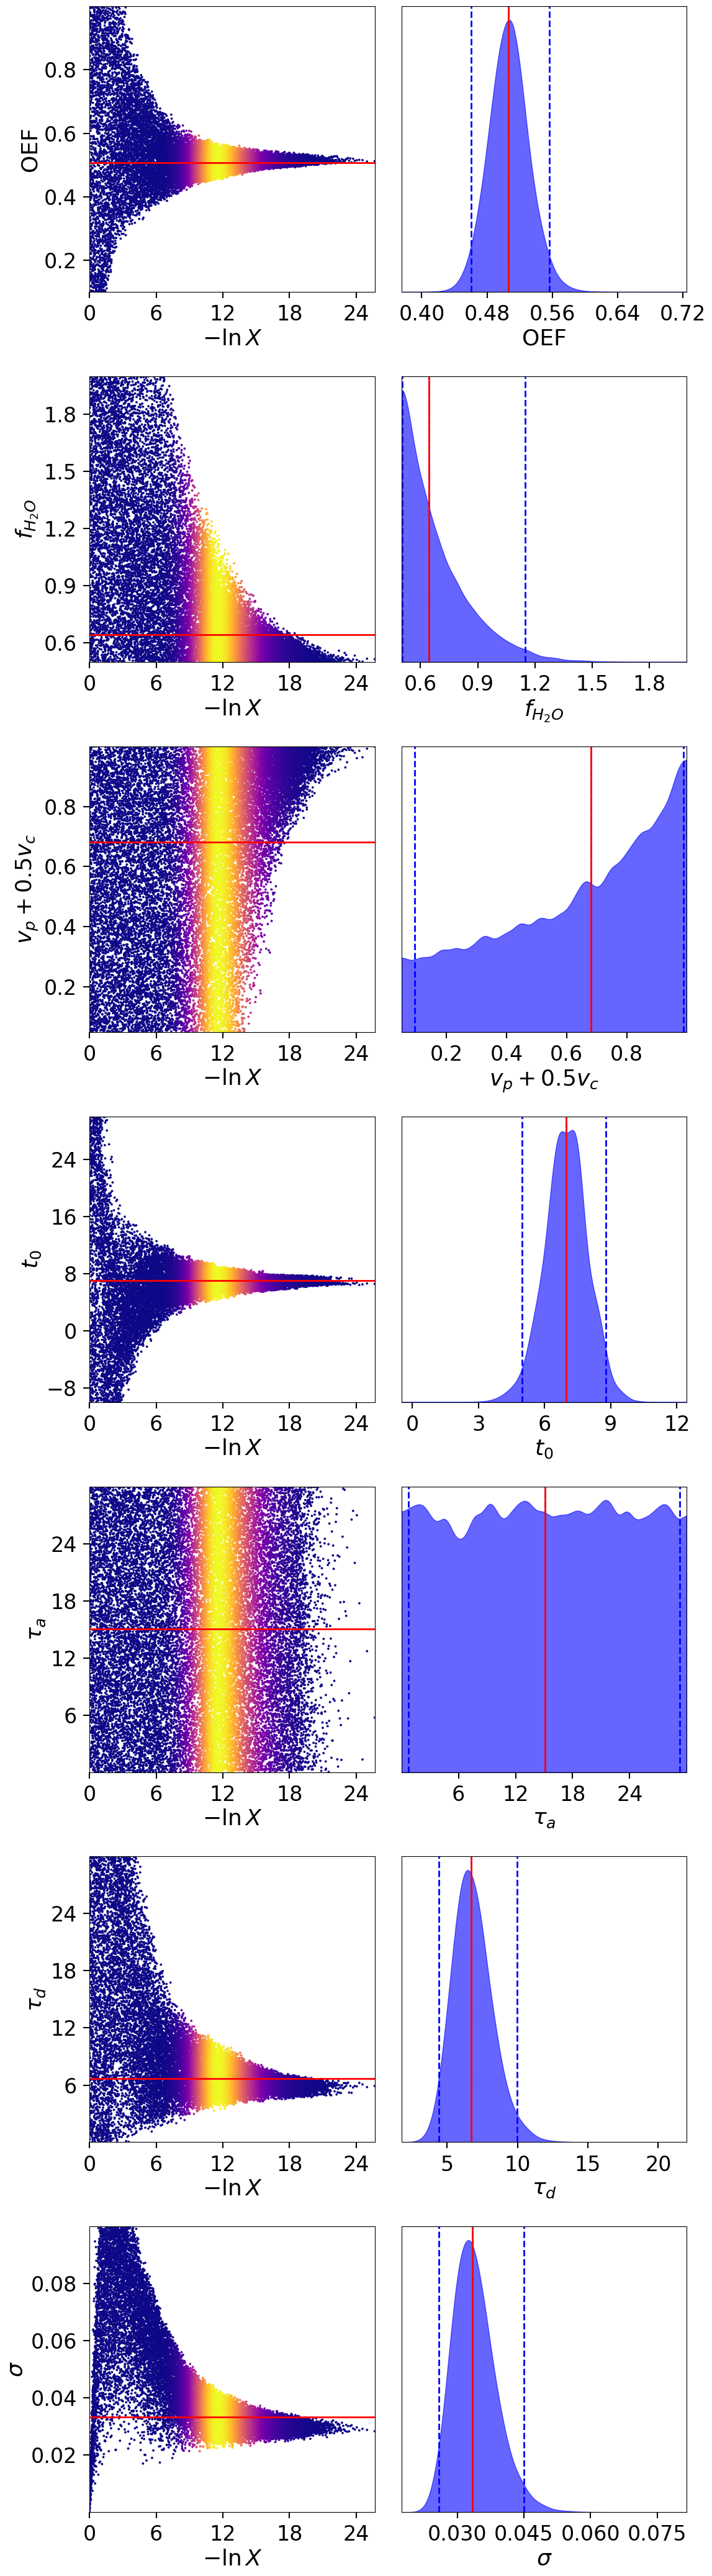

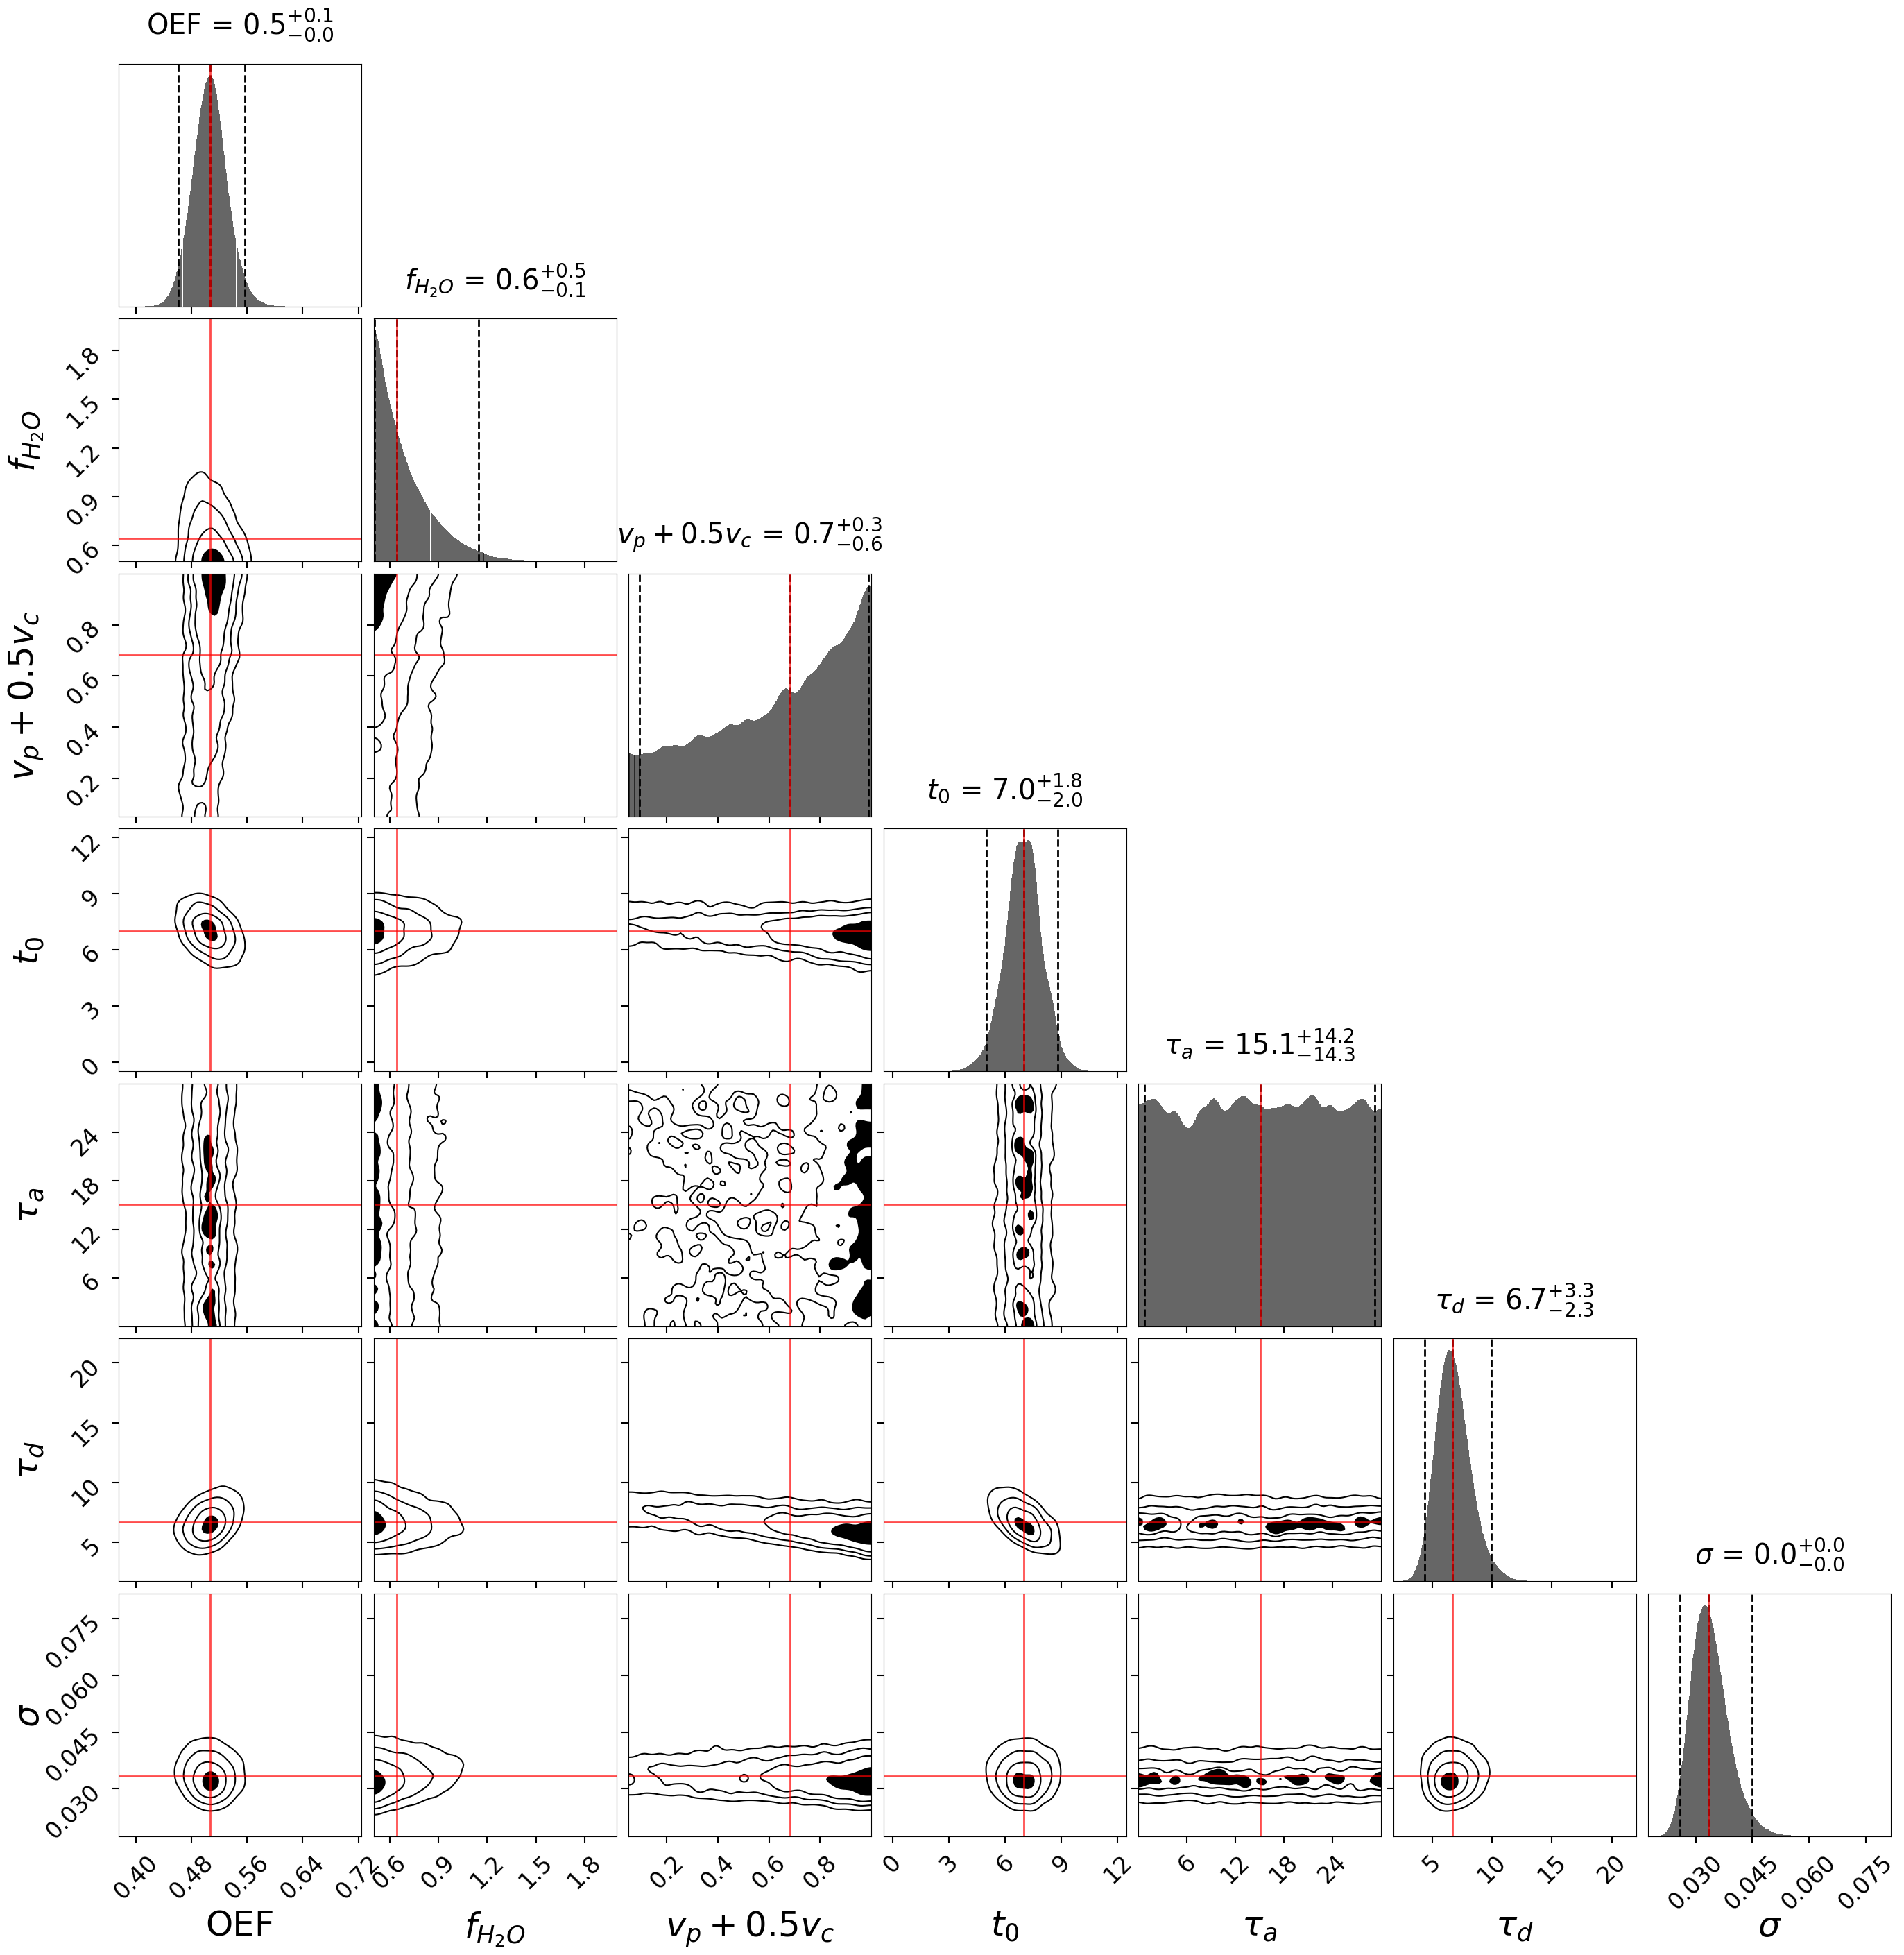

In [6]:
mm_twil.plotting.results_plot(tag="playground_mintun1984_twil", parc_index=9)

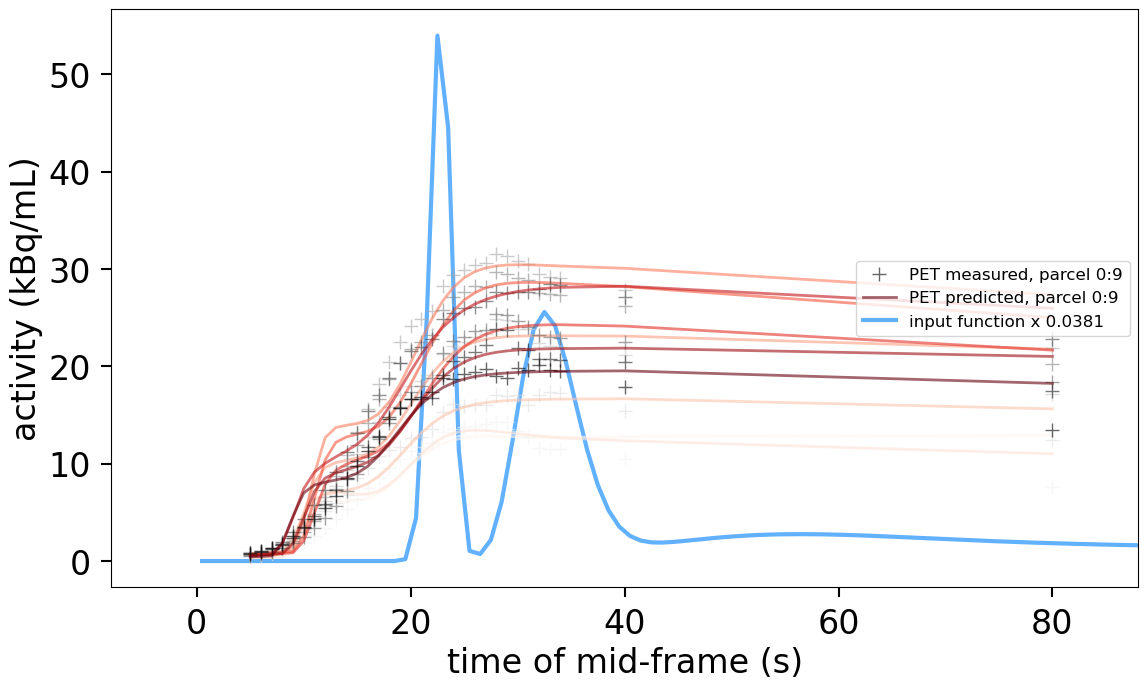

In [7]:
mm_twil.plotting.parcs_plot()

## Inspect Mintun1984Context idif

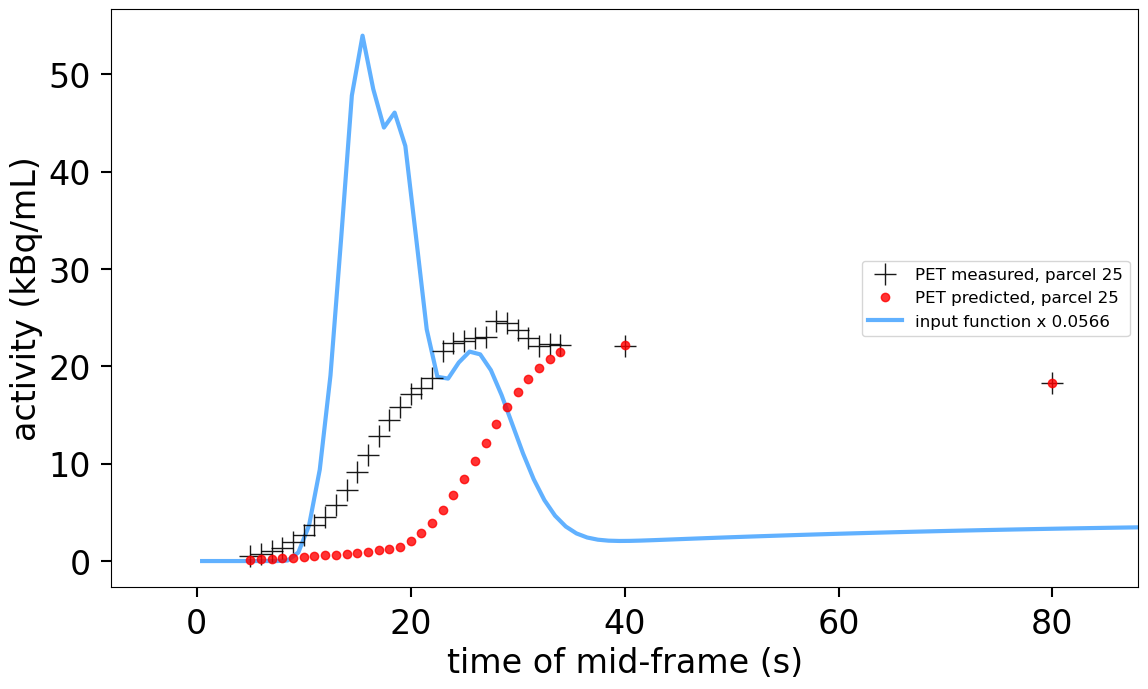

In [8]:
mm_idif.plotting.truths_plot(truths=truth_idif, parc_index=parc_index)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [9]:
# de novo, thalamus ~ 6, 25
res_idif = mm_idif.solver.run_nested(print_progress=True, parc_index=range(10))

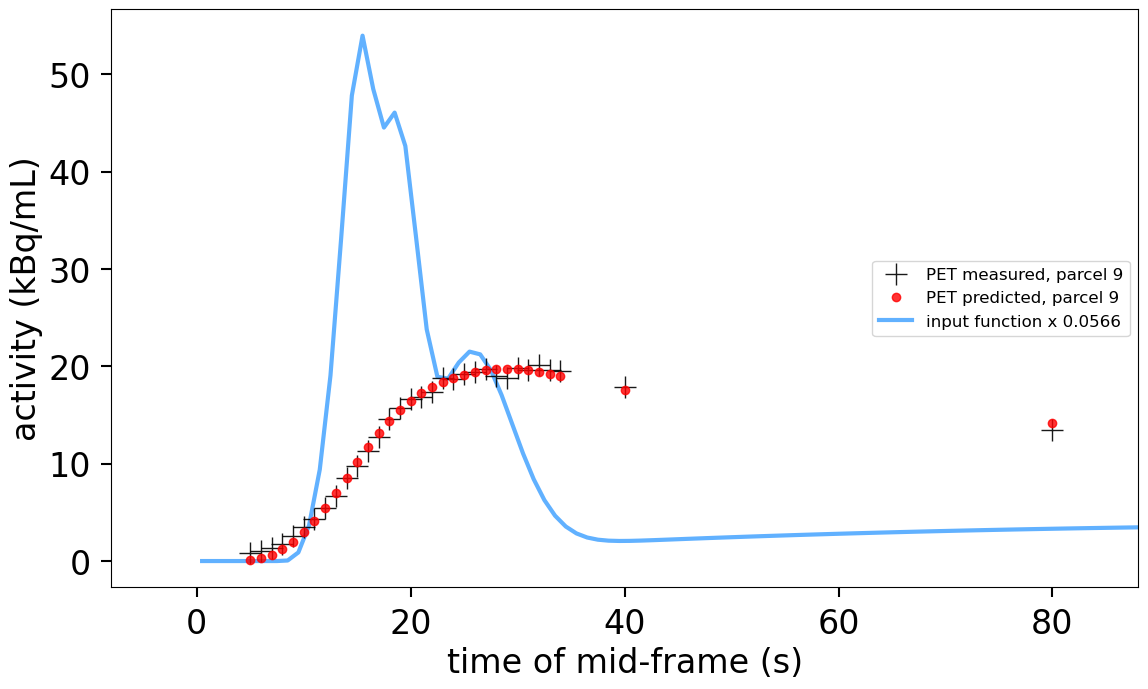

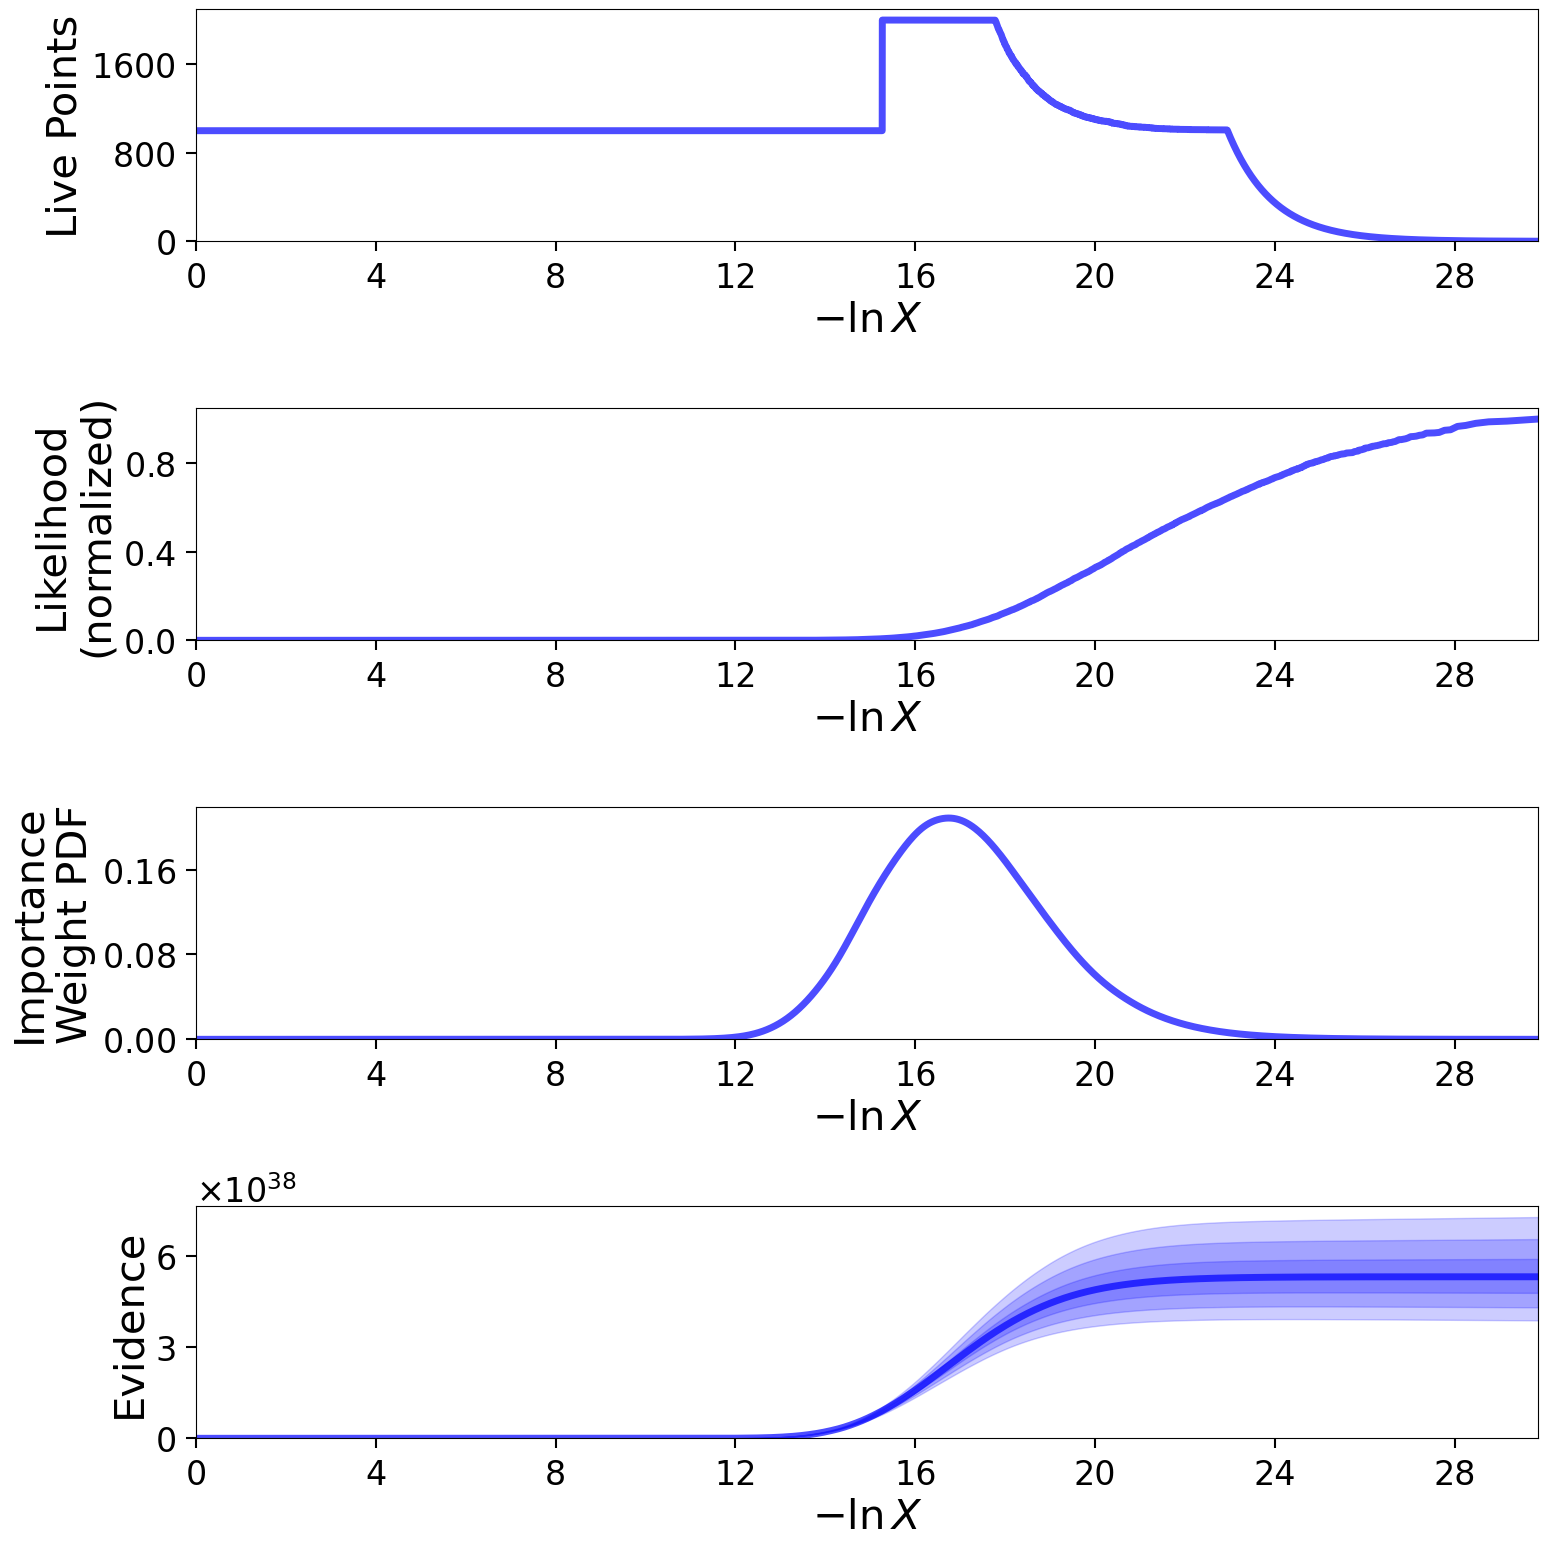

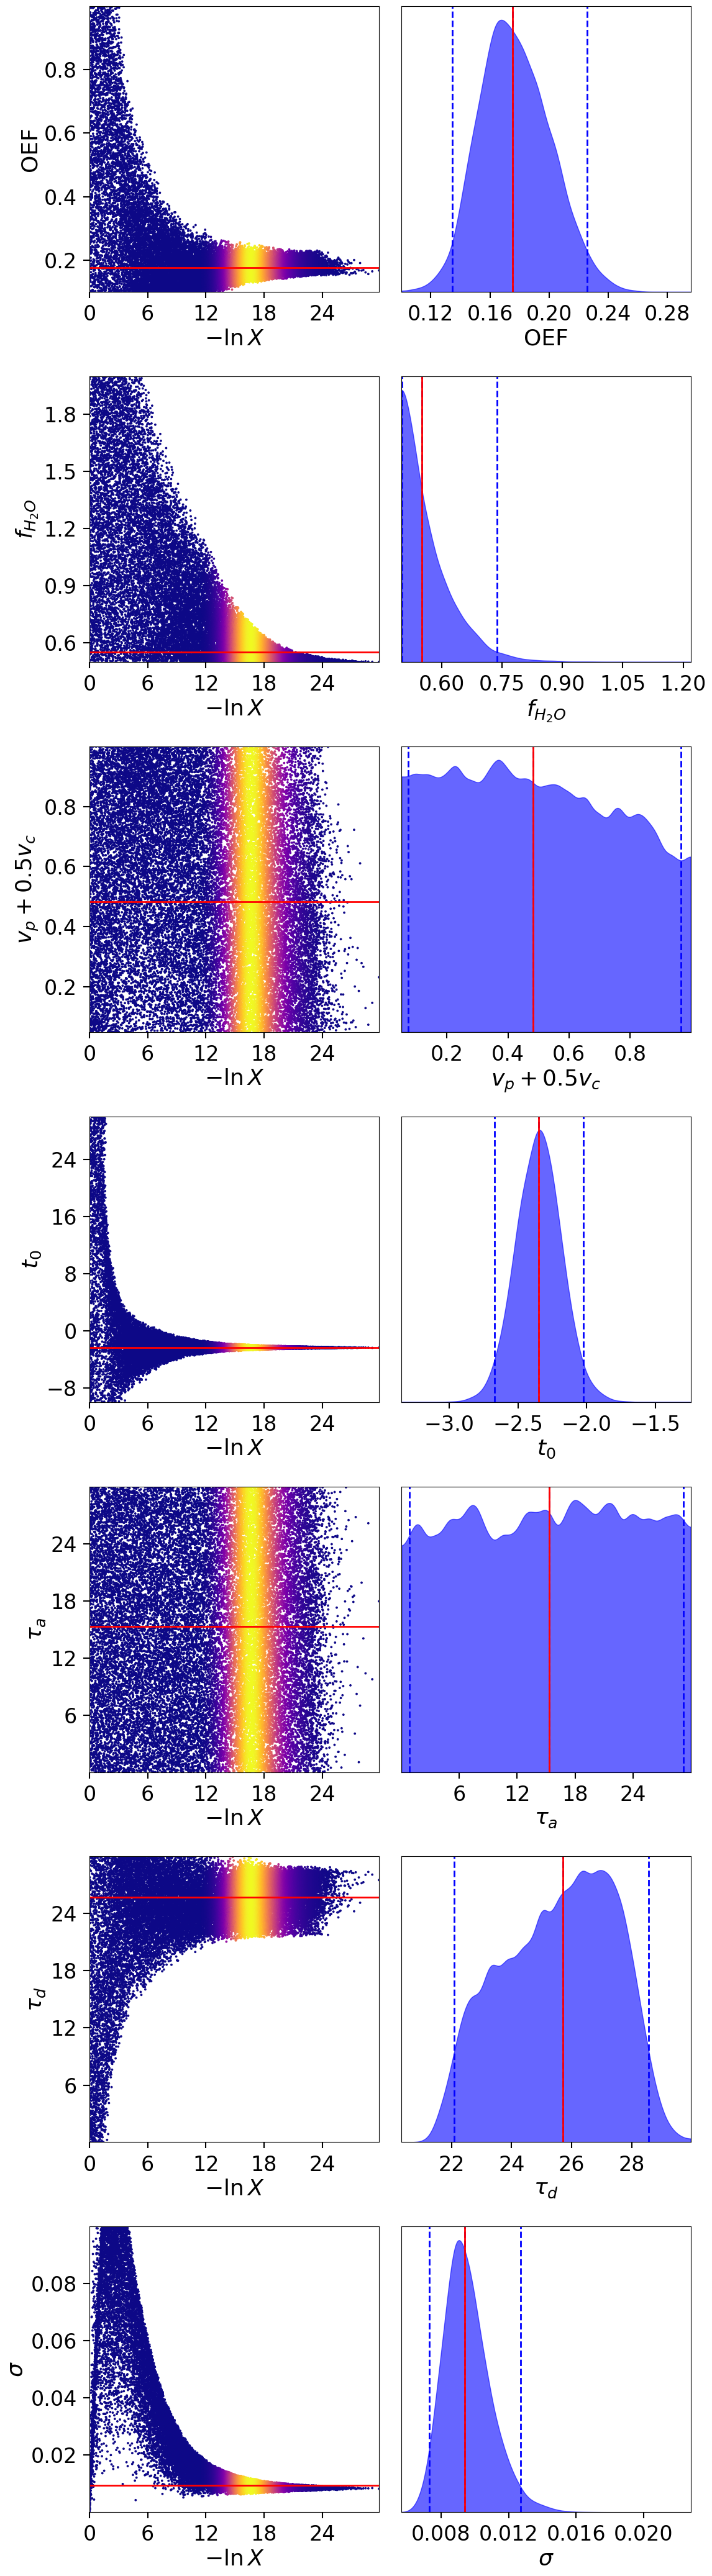

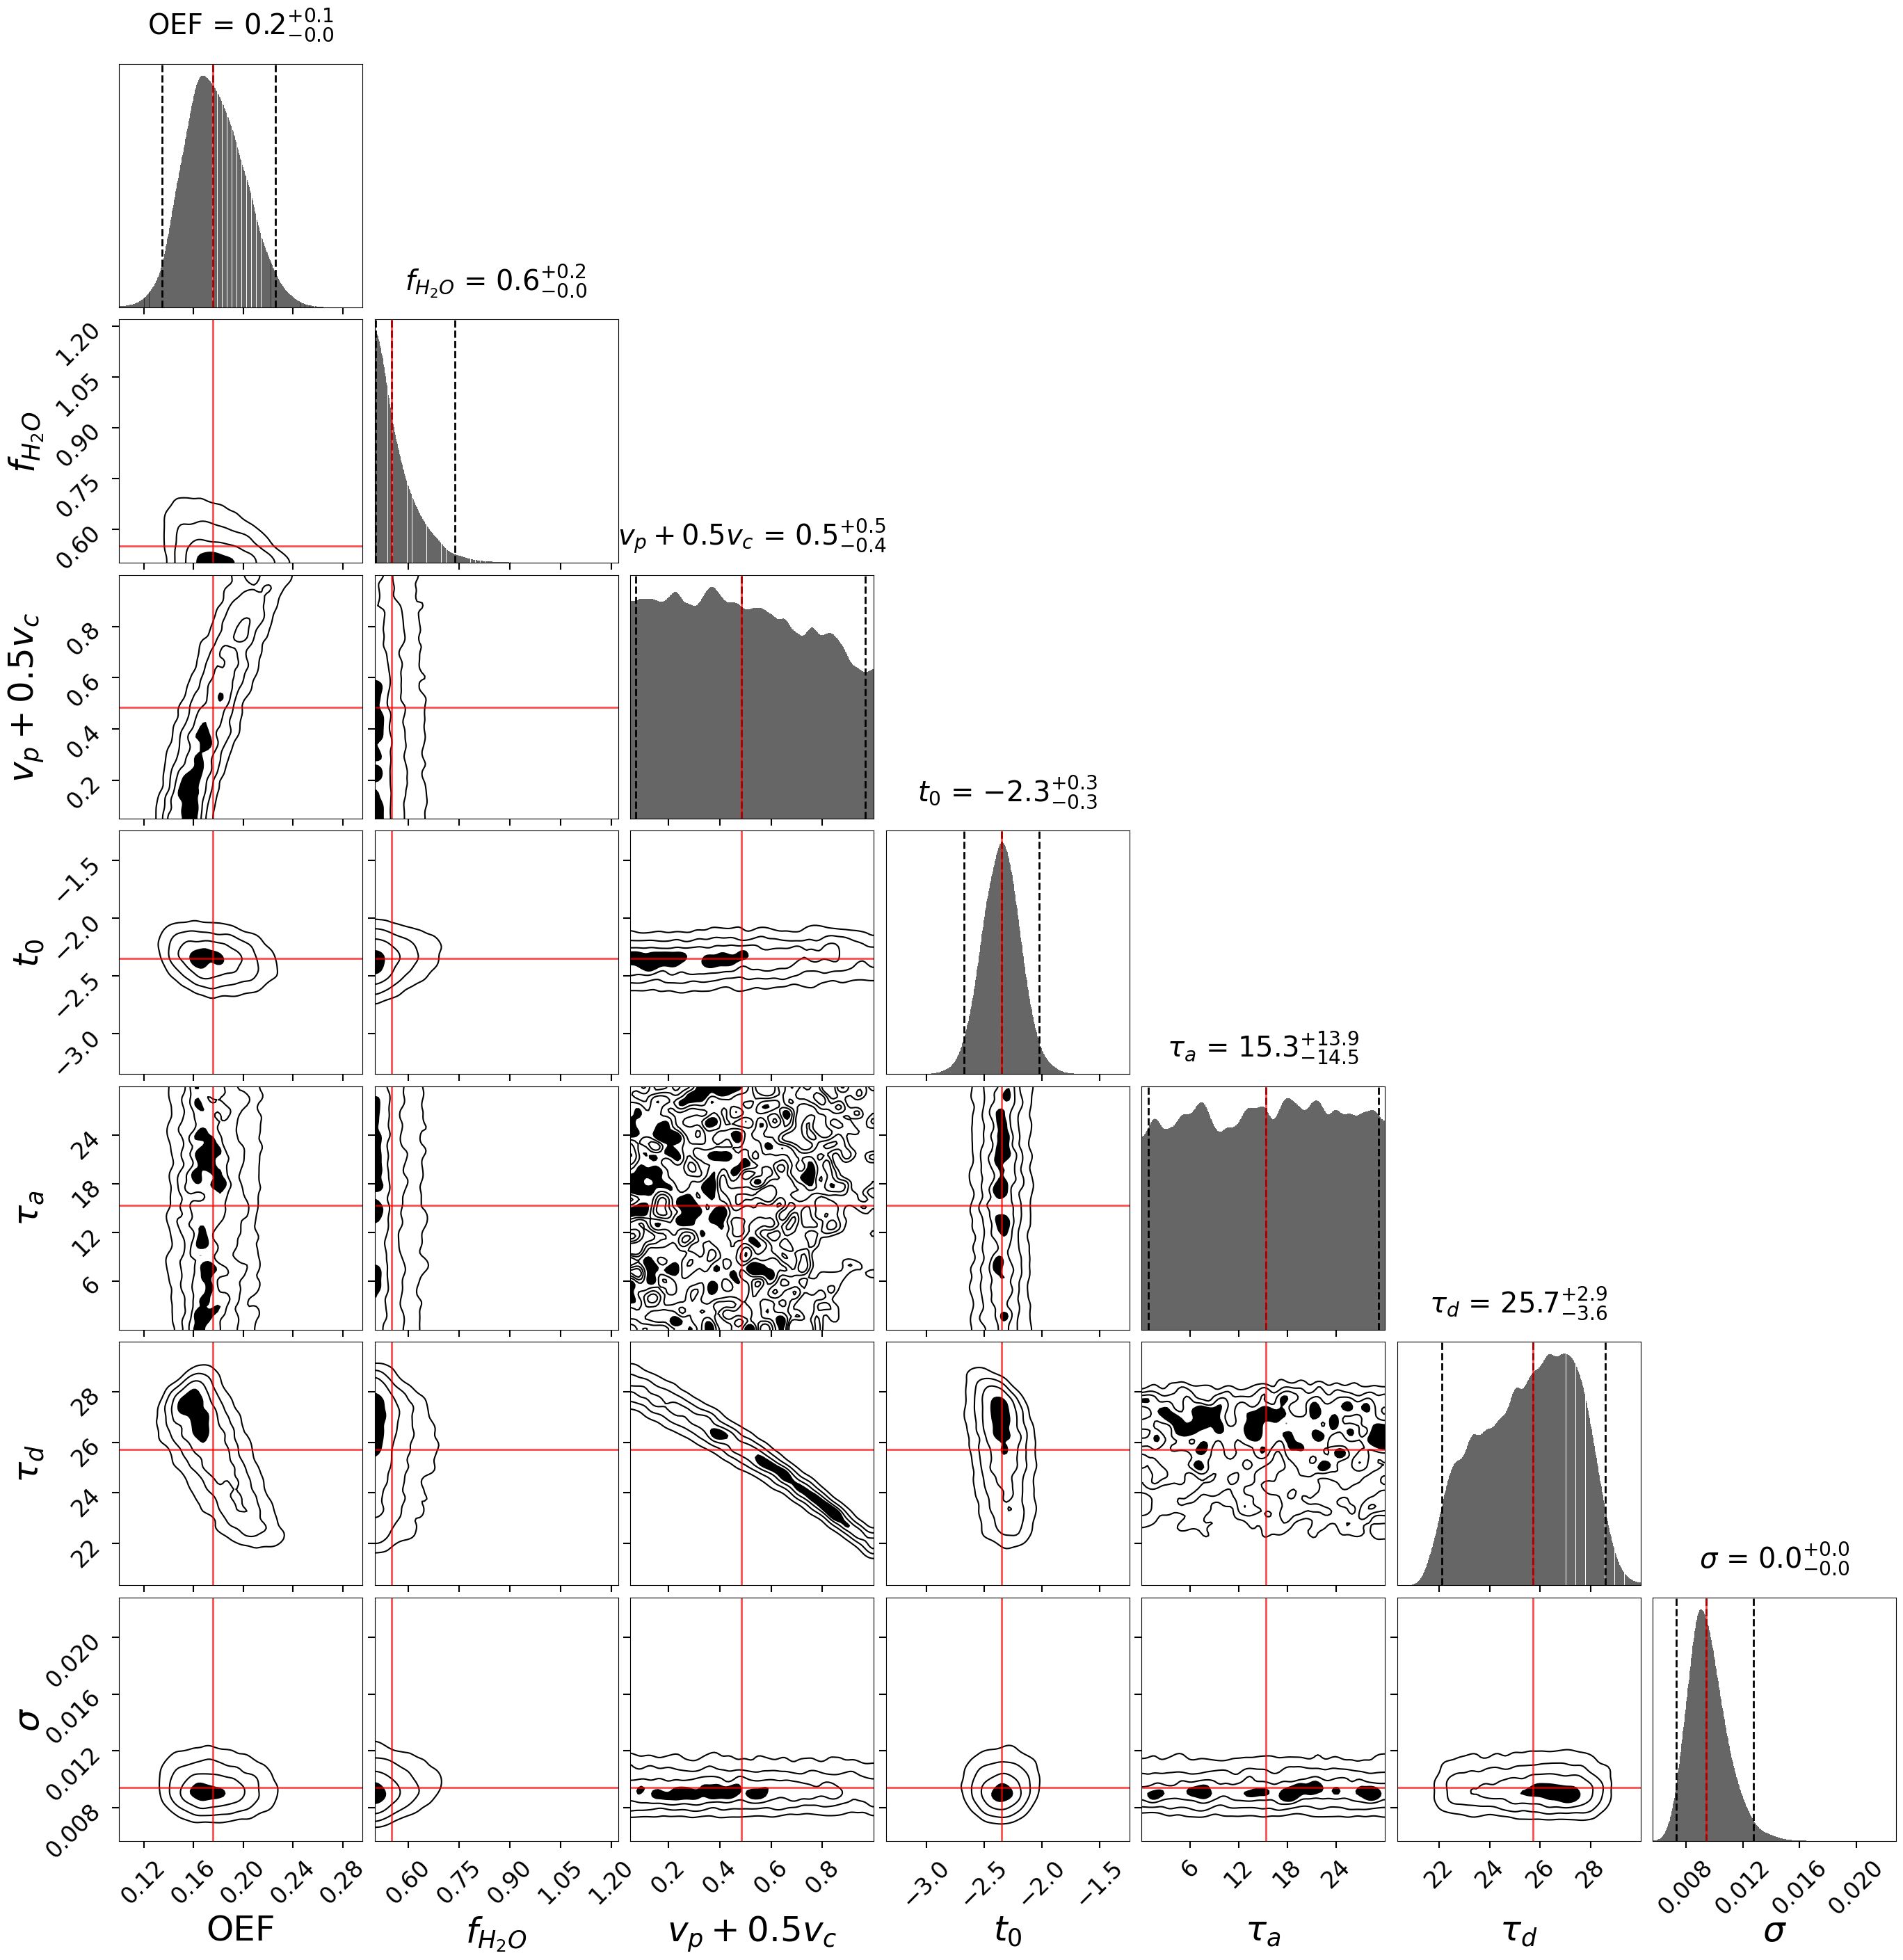

In [10]:
mm_idif.plotting.results_plot(tag="playground_mintun1984_idif", parc_index=9)

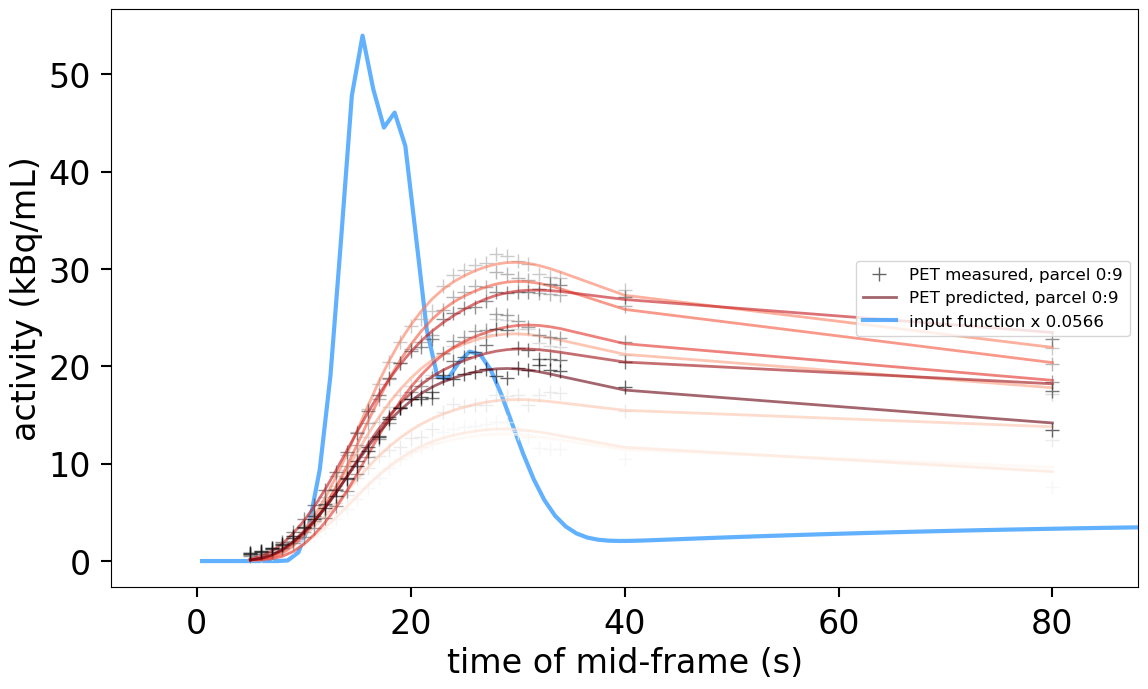

In [11]:
mm_idif.plotting.parcs_plot()

In [12]:
mm_twil.data.print_truths()
mm_idif.data.print_truths()



=============================== Truths ===============================
Parameter                        Value
----------------------------------------

Row 0:
OEF                            0.56430
$f_{H_2O}$                     0.69477
$v_p + 0.5 v_c$                0.48987
$t_0$                          7.89438
$\tau_a$                      15.04530
$\tau_d$                       6.14071
$\sigma$                       0.02422

Row 1:
OEF                            0.71462
$f_{H_2O}$                     0.91617
$v_p + 0.5 v_c$                0.36788
$t_0$                          8.54427
$\tau_a$                      14.93068
$\tau_d$                       6.43931
$\sigma$                       0.02943

Row 2:
OEF                            0.46099
$f_{H_2O}$                     0.59862
$v_p + 0.5 v_c$                0.73225
$t_0$                          7.63657
$\tau_a$                      14.91498
$\tau_d$                       6.73783
$\sigma$                       0.02236

Row

In [13]:
pprint(mm_twil.solver.truths)
pprint(mm_idif.solver.truths)

array([[ 0.5643004 ,  0.6947651 ,  0.48987012,  7.89438119, 15.04529671,
         6.14070511,  0.02422398],
       [ 0.71462325,  0.91616563,  0.36788117,  8.54427192, 14.93068362,
         6.43930978,  0.0294259 ],
       [ 0.4609926 ,  0.59862181,  0.73225088,  7.63657293, 14.91498411,
         6.73782778,  0.02236427],
       [ 0.54625043,  0.66903094,  0.68094155,  8.29340427, 14.96986138,
         5.43671514,  0.03573469],
       [ 0.58720422,  0.74289202,  0.64113604,  8.83104906, 15.3042056 ,
         6.11014065,  0.05097728],
       [ 0.52878137,  0.68490321,  0.6688019 ,  9.22764712, 15.06344204,
         5.62043932,  0.04497758],
       [ 0.55639298,  0.68204645,  0.71503412,  9.16648259, 15.33508094,
         5.24287879,  0.03365453],
       [ 0.56009357,  0.65906084,  0.79590341,  7.20656302, 15.18441096,
         6.015782  ,  0.03248018],
       [ 0.56946943,  0.6739858 ,  0.71822755,  8.2155383 , 15.04033453,
         4.66734258,  0.03122648],
       [ 0.50633365,  0.6431